### 1 - Packages ###
Let's first import all the packages that you will need during this assignment.

numpy is the fundamental package for scientific computing with Python.
sklearn provides simple and efficient tools for data mining and data analysis.
matplotlib is a library for plotting graphs in Python.
testCases provides some test examples to assess the correctness of your functions
planar_utils provide various useful functions used in this assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
np.random.seed(42)

### 2 - Load dataset ###

In [8]:
X, y = load_planar_dataset()
X

array([[ 1.20444229e+00,  1.58709904e-01,  9.52471960e-02,
         3.49178475e-01,  6.94150378e-01,  1.62065038e+00,
         1.53856225e+00,  3.63085641e-02,  4.74591109e-01,
         1.65695828e-01,  1.66446249e+00,  8.40285720e-01,
         2.61695163e-01,  2.31614896e-01,  1.58013020e+00,
         6.35509950e-03,  6.80610419e-01,  1.21400432e-01,
         1.13281261e+00,  1.61505892e+00,  1.66454441e-01,
         1.72438241e+00,  1.88667246e+00,  1.72327227e+00,
         1.54661332e+00,  9.84590400e-01,  1.45313345e+00,
         7.49043388e-01,  1.45048341e+00,  1.64287865e+00,
         1.28141487e+00,  1.59574104e+00,  1.46298294e+00,
         1.46629048e+00,  1.54348961e+00,  1.57013416e+00,
         1.22995404e+00,  1.31142345e+00, -1.99364553e+00,
         3.94564752e-01,  1.51715449e+00,  1.69169139e+00,
         1.74186686e+00, -2.91373382e+00,  7.52150898e-01,
         1.68537303e+00,  3.71160238e-01, -3.73033884e+00,
         3.52484080e-01, -1.48694206e+00, -7.45290416e-0

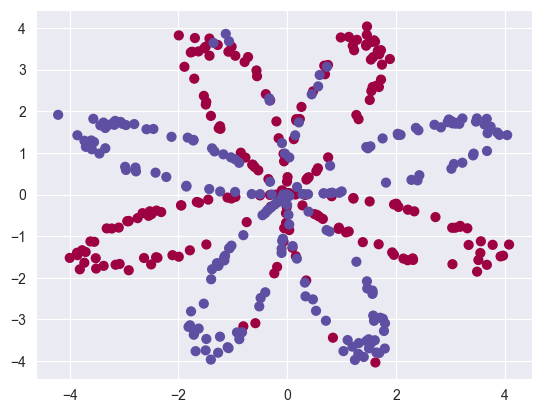

In [19]:
# Visualize dataset
plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral, s=40)

### Test with simple logistic regression

In [24]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, y.T)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

#### Plot decision boundary for logistic regression

Text(0.5, 1.0, 'Logistic Regression')

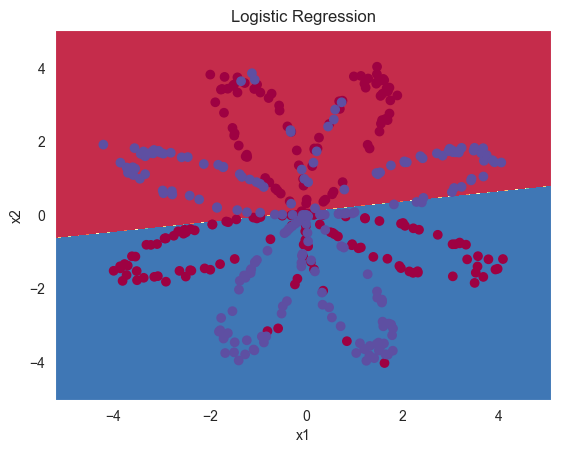

In [26]:
plot_decision_boundary(lambda x: clf.predict(x), X, y)
plt.title("Logistic Regression")

#### Calculate model accuracy

In [37]:
LR_predictions = clf.predict(X.T)
LR_predictions
print ('Accuracy of logistic regression: %d ' % float((np.dot(y,LR_predictions) + np.dot(1-y,1-LR_predictions))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


<b>Conclusion: </b> The dataset is not linearly separable, so logistic regression doesn't perform well. 